Parisa Tavakoli Kashi
40013036

# Adding Dataset

In [1]:
!pip3 install -U ucimlrepo

The code installs the ucimlrepo Python package and uses it to fetch the Iris dataset from the UCI Machine Learning Repository, extracting its features and target labels into separate variables and displaying the dataset's metadata and variable information.

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

1. Descriptive Statistics:

  This will give us an overview of the dataset, including mean, median, standard deviation, and range for each feature.

2. Data Visualization:

  We can create some plots to visually explore the data. Common plots for this purpose include scatter plots, box plots, and histograms.

3. Check for Missing Values:

  Even though the dataset is known to be clean, it's good practice to check for any missing values.


In [3]:
import pandas as pd

# Combine features and target into a single DataFrame for easier analysis
iris_df = pd.DataFrame(X, columns=["sepal length", "sepal width", "petal length", "petal width"])
iris_df['class'] = y

# Descriptive statistics
descriptive_stats = iris_df.describe()

# Checking for missing values
missing_values = iris_df.isnull().sum()

# Print the results
print(descriptive_stats)
print(missing_values)


       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64


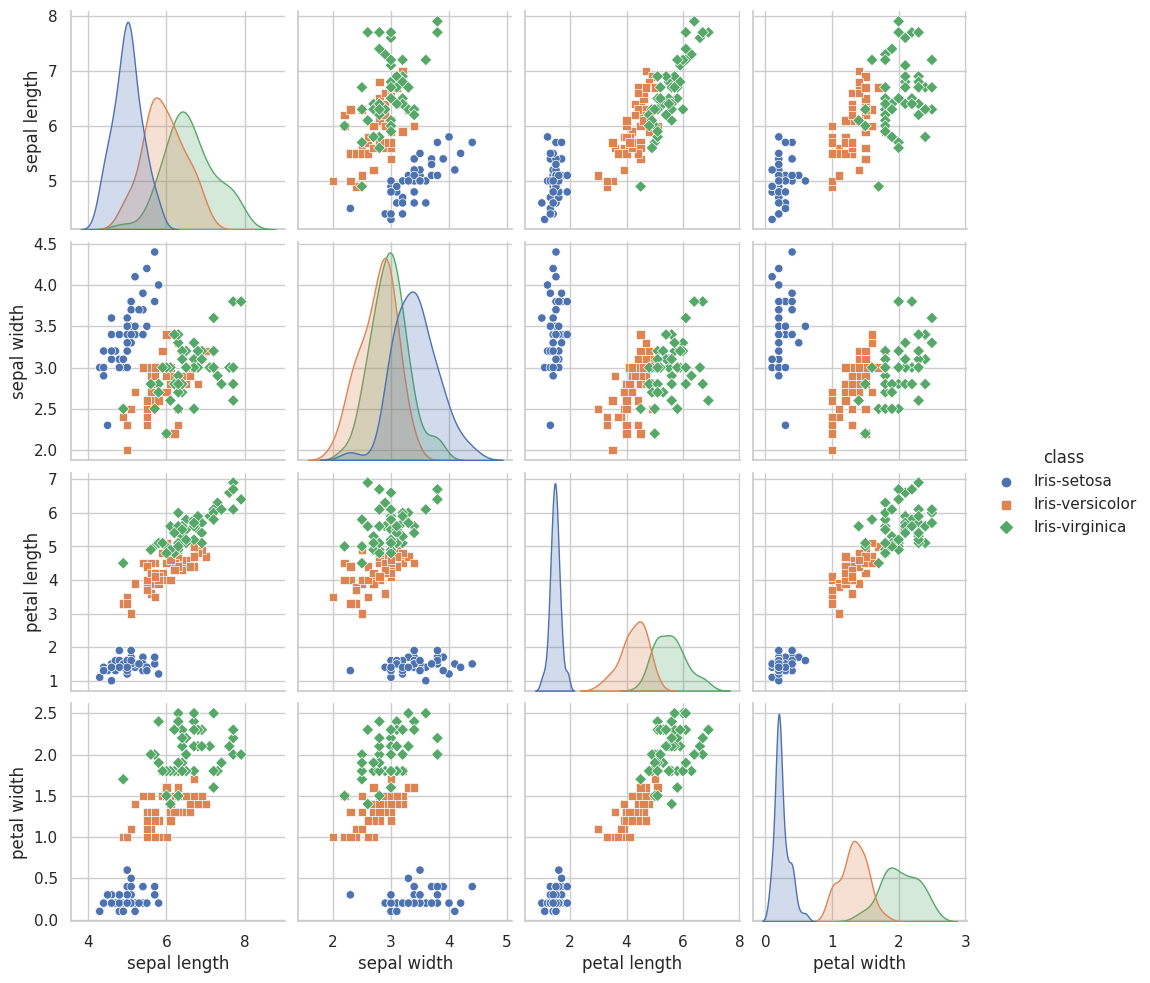

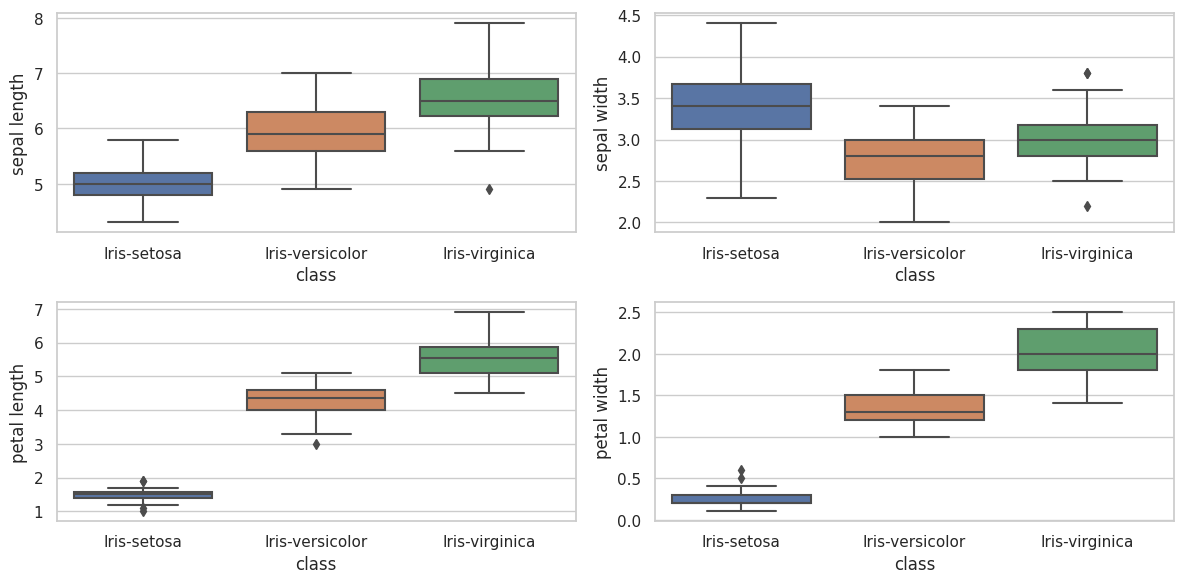

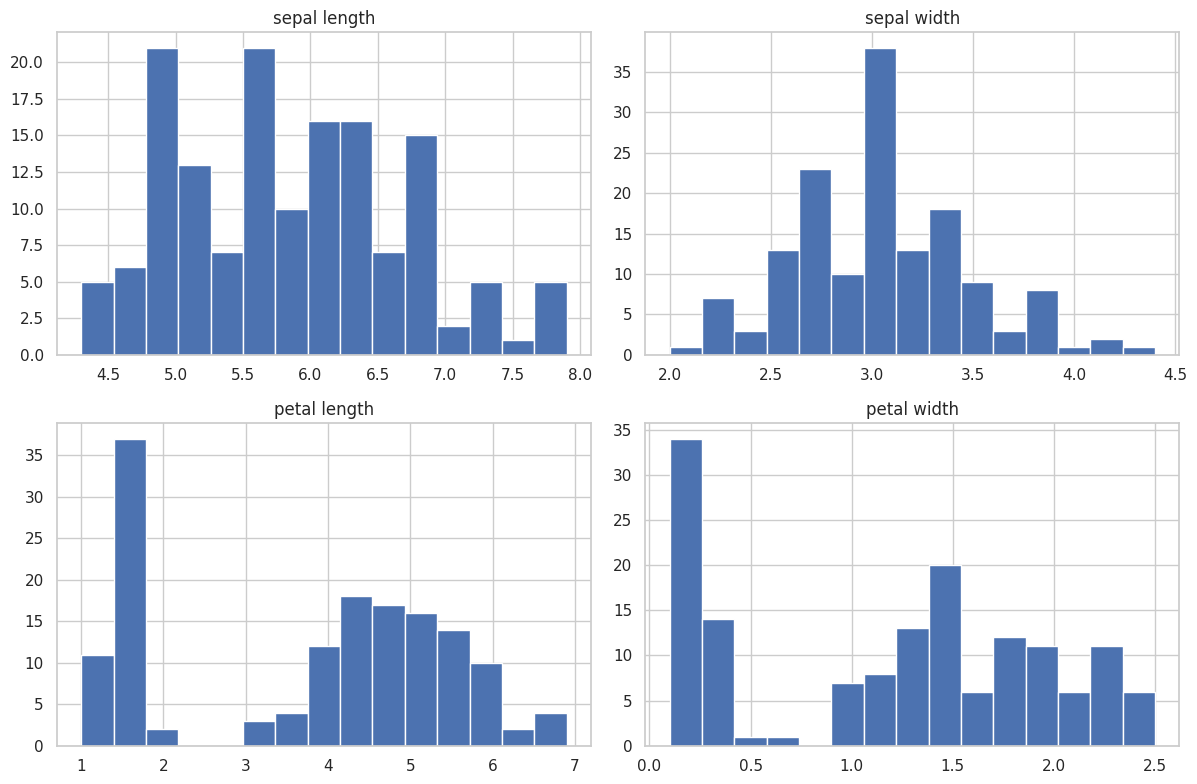

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Scatter plot for each pair of features
sns.pairplot(iris_df, hue='class', markers=["o", "s", "D"])

# Box plots for each feature
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris_df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='class', y=feature, data=iris_df)

plt.tight_layout()
plt.show()

# Histograms for each feature
iris_df.hist(figsize=(12, 8), bins=15)
plt.tight_layout()
plt.show()

# Population Initialization

let's assume we want a population of 10 chromosomes and we'll allow up to 3 clusters (k = 3) for the Iris dataset.

In [5]:
import numpy as np

def initialize_population(data_points, population_size, max_clusters):
    """
    Initializes a population of chromosomes for the genetic algorithm.

    Parameters:
    data_points (int): The number of data points in the dataset.
    population_size (int): The number of chromosomes in the population.
    max_clusters (int): The maximum number of clusters to consider.

    Returns:
    list: A list of chromosomes, each represented as an array of cluster assignments.
    """

    population = []
    for _ in range(population_size):
        # Randomly assign each data point to a cluster
        clusters = np.random.randint(1, max_clusters + 1, size=data_points)
        # The last element is the number of clusters used
        chromosome = np.append(clusters, max_clusters)
        population.append(chromosome)
    return population

# Example usage
population_size = 10
max_clusters = 3
n_data_points = len(iris_df)  # Assuming iris_df is your Iris DataFrame
initial_population = initialize_population(n_data_points, population_size, max_clusters)

# 1. Crossover Function

The crossover function will combine two chromosomes (parent solutions) to produce new offspring (solutions). There are various ways to implement crossover. I will use a simple approach where we split two parent chromosomes at a random point and swap their segments to create two new offspring.

In [6]:
def crossover(parent1, parent2):
    # Choose a random crossover point
    crossover_point = np.random.randint(1, len(parent1)-1)
    # Create offspring by combining segments of parents
    offspring1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    offspring2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return offspring1, offspring2

Optimization:


Instead of a simple single-point crossover, we will be using multi-point crossover or uniform crossover to mix parental features more diversely.

Enhanced Crossover Function

In [7]:
def uniform_crossover(parent1, parent2):
    offspring1, offspring2 = parent1.copy(), parent2.copy()
    for i in range(len(parent1) - 1):  # Exclude the last element
        if np.random.rand() < 0.5:  # 50% chance to swap each gene
            offspring1[i], offspring2[i] = offspring2[i], offspring1[i]
    return offspring1, offspring2


Based on project guide:

1. Specific Segment Crossover

In this method, a segment from one parent is directly swapped into the other parent, affecting the clusters' representation. For instance:

* Parent1: 2|2222|111113333344444
* Parent2: 4|4444|333335555511111
* Offspring1: 2 4444 111113333344444
* Offspring2: 4 2222 333335555511111

This can be implemented by choosing a segment (denoted by |) and swapping it between the two parents.

In [8]:
def segment_crossover(parent1, parent2):
    """
    Performs crossover between two parent chromosomes to produce offspring.

    Parameters:
    parent1 (array): The first parent chromosome.
    parent2 (array): The second parent chromosome.

    Returns:
    tuple: Two offspring chromosomes resulting from the crossover.
    """
    # Choose a random crossover point
    crossover_point = np.random.randint(1, len(parent1)-1)
    # Create offspring by swapping segments
    offspring1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    offspring2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return offspring1, offspring2


2. Cluster-Based Crossover
In this approach, specific clusters from one parent are combined with the rest of the clusters from the other parent. For instance:

* Parent A: 1123245125432533424
* Parent B: 1212332124423221321
* Considering clusters 1 and 2 in A, we find their counterparts in B (clusters 1, 2, and 3).
* Offspring is created by combining these clusters, potentially leading to a division into 3 clusters as in B.

In [9]:
def cluster_based_crossover(parent_a, parent_b, data):
    # Select a cluster randomly from parent A
    cluster_a = np.random.choice(parent_a[:-1])
    # Find the corresponding clusters in parent B
    clusters_b = np.unique(parent_b[parent_b[:-1] == cluster_a])

    # Create offspring
    offspring = parent_a.copy()
    for i in range(len(data)):
        if parent_b[i] in clusters_b:
            offspring[i] = parent_b[i]
    return offspring

# 2. Mutation Function

The mutation function introduces small random changes in a chromosome to maintain genetic diversity. For simplicity, we can randomly select a data point in a chromosome and change its cluster assignment.

In [10]:
def mutate(chromosome, max_clusters):
    # Select a random mutation point (excluding the last element)
    mutation_point = np.random.randint(0, len(chromosome)-1)
    # Change the cluster assignment randomly
    chromosome[mutation_point] = np.random.randint(1, max_clusters + 1)

Optimization:

Incorporate a probability of mutation that decreases over generations, or mutate based on the proximity of data points to their cluster centers.

Mutation Function with Decreasing Probability

In [11]:
def adaptive_mutate(chromosome, max_clusters, generation, max_generations):
    mutation_rate = 1 - (generation / max_generations)  # Decreases over time
    for i in range(len(chromosome) - 1):  # Exclude the last element
        if np.random.rand() < mutation_rate:
            chromosome[i] = np.random.randint(1, max_clusters + 1)


Approach 1 based on project guide:

Select one of the data points and randomly change the label of the class it belongs to with another label.

In [30]:
def mutate(chromosome, max_clusters):
    # Select a random data point (excluding the last element that represents total clusters)
    mutation_point = np.random.randint(0, len(chromosome) - 1)
    # Assign a new cluster label, different from its current label
    current_label = chromosome[mutation_point]
    new_label = current_label
    while new_label == current_label:
        new_label = np.random.randint(1, max_clusters + 1)
    chromosome[mutation_point] = new_label


Approach 2 based on project guide:

Select one of the data points and change the label of the class it belongs to to the label of the class closest to that data point.

To implement the mutation method where the label of a selected data point is changed to the label of the class closest to that data point, we need a way to determine the "closest" class. This typically involves calculating the distances between the data point and the centroids of the other clusters and then choosing the cluster with the nearest centroid.

In [13]:
def mutate_to_closest_cluster(chromosome, data, max_clusters):
    # Select a random data point (excluding the last element)
    mutation_point = np.random.randint(0, len(chromosome) - 1)
    selected_data_point = data[mutation_point]

    # Calculate centroids of each cluster
    centroids = []
    for cluster in range(1, max_clusters + 1):
        cluster_points = data[chromosome[:-1] == cluster]
        if len(cluster_points) > 0:
            centroid = np.mean(cluster_points, axis=0)
            centroids.append((cluster, centroid))
        else:
            centroids.append((cluster, None))

    # Find the closest cluster
    min_distance = float('inf')
    closest_cluster = chromosome[mutation_point]
    for cluster, centroid in centroids:
        if centroid is not None:
            distance = np.sqrt(np.sum((selected_data_point - centroid) ** 2))
            if distance < min_distance:
                min_distance = distance
                closest_cluster = cluster

    # Change the cluster of the selected data point to the closest cluster
    chromosome[mutation_point] = closest_cluster


Approach 3 based on project guide:

Choose one of the clusters and find the closest cluster to it based on the centeroid and then change the label of all the members of this cluster with the label of the closest cluster.

To implement the mutation method where we select a cluster, find the closest cluster to it based on centroids, and then change the labels of all members in the selected cluster to the label of the closest cluster, we need to follow these steps:

1. Select a Random Cluster:

  Choose one of the clusters randomly.

2. Calculate Centroids for All Clusters:

  Compute the centroids of each cluster.

3. Find the Closest Cluster:

  Determine which cluster's centroid is closest to the selected cluster's centroid.

4. Change Labels:

  Change the cluster labels of all data points in the selected cluster to the label of the closest cluster.

In [14]:
def mutate_cluster_to_closest(chromosome, data, max_clusters):
    # Select a random cluster (excluding the last element)
    selected_cluster = np.random.randint(1, max_clusters + 1)

    # Calculate centroids of each cluster
    centroids = {}
    for cluster in range(1, max_clusters + 1):
        cluster_points = data[chromosome[:-1] == cluster]
        if len(cluster_points) > 0:
            centroids[cluster] = np.mean(cluster_points, axis=0)

    # Find the closest cluster
    min_distance = float('inf')
    closest_cluster = selected_cluster
    selected_centroid = centroids[selected_cluster]
    for cluster, centroid in centroids.items():
        if cluster != selected_cluster:
            distance = np.linalg.norm(selected_centroid - centroid)
            if distance < min_distance:
                min_distance = distance
                closest_cluster = cluster

    # Change the labels of all members in the selected cluster to the closest cluster
    chromosome[:-1][chromosome[:-1] == selected_cluster] = closest_cluster


Approach 4 based on project guide:

Divide a cluster into two clusters, which can be based on the distance from the centeroid in that cluster.

To implement the mutation method that divides a cluster into two based on the distance from the centroid, we need to follow these steps:

1. Select a Random Cluster:

  Choose one of the clusters randomly.

2. Calculate the Centroid of the Selected Cluster:

  Compute the centroid of the selected cluster.

3. Divide Based on Distance:

  Split the cluster into two by assigning each data point to the new cluster 1 or 2 based on its distance from the centroid. The data points closer to the centroid will stay in the original cluster, and the farther ones will form a new cluster.

In [31]:
def mutate_divide_cluster(chromosome, data, max_clusters):
    # Select a random cluster (excluding the last element)
    selected_cluster = np.random.randint(1, max_clusters + 1)

    # Calculate the centroid of the selected cluster
    cluster_points = data[chromosome[:-1] == selected_cluster]
    if len(cluster_points) <= 1:
        return  # Cannot divide a cluster with 0 or 1 point

    centroid = np.mean(cluster_points, axis=0)

    # Calculate distances of all points in the cluster from the centroid
    distances = np.linalg.norm(cluster_points - centroid, axis=1)
    median_distance = np.median(distances)

    # Divide the cluster into two based on the distance
    new_cluster_label = max_clusters + 1
    for i, point in enumerate(data):
        if chromosome[i] == selected_cluster:
            if np.linalg.norm(point - centroid) > median_distance:
                chromosome[i] = new_cluster_label

    # Update the total number of clusters if a new cluster was created
    if new_cluster_label > max_clusters:
        chromosome[-1] += 1


new method using a combination of the above methods:

**Combined Mutation Function**

This function will first divide a selected cluster into two, based on distance from the centroid. Then, for one of the new clusters, it will relabel some points to the nearest cluster based on centroid proximity. Finally, it will apply a simple random mutation for a few points.

In [16]:
def combined_mutation(chromosome, data, max_clusters):
    """
    Applies mutation to a chromosome by dividing a cluster and randomly changing cluster assignments.

    Parameters:
    chromosome (array): The chromosome to mutate.
    data (array-like): The dataset for which the clustering is being performed.
    max_clusters (int): The maximum number of clusters.

    Returns:
    None: The function modifies the chromosome in place.
    """
    # Step 1: Select and divide a cluster
    selected_cluster = np.random.randint(1, max_clusters + 1)
    cluster_points = data[chromosome[:-1] == selected_cluster]

    # Initialize the new cluster label
    new_cluster_label = max_clusters + 1

    if len(cluster_points) > 1:  # Proceed only if the cluster has more than one point
        centroid = np.mean(cluster_points, axis=0)
        distances = np.linalg.norm(cluster_points - centroid, axis=1)
        median_distance = np.median(distances)

        # Create a new cluster
        for i, point in enumerate(data):
            if chromosome[i] == selected_cluster:
                if np.linalg.norm(point - centroid) > median_distance:
                    chromosome[i] = new_cluster_label

        # Update total clusters
        if new_cluster_label > max_clusters:
            chromosome[-1] += 1
            max_clusters += 1

    # Step 2: Relabel points in the new cluster to the nearest cluster
    # Ensure new_cluster_label is within the updated max_clusters range
    if new_cluster_label <= max_clusters:
        for i, point in enumerate(data):
            if chromosome[i] == new_cluster_label:
                min_distance = float('inf')
                closest_cluster = new_cluster_label
                for cluster in range(1, max_clusters + 1):
                    if cluster != new_cluster_label:
                        cluster_points = data[chromosome[:-1] == cluster]
                        if len(cluster_points) == 0:
                            continue
                        centroid = np.mean(cluster_points, axis=0)
                        distance = np.linalg.norm(point - centroid)
                        if distance < min_distance:
                            min_distance = distance
                            closest_cluster = cluster
                chromosome[i] = closest_cluster

    # Step 3: Apply simple random mutation to a few points
    for _ in range(int(len(data) * 0.05)):  # Mutate 5% of the points
        mutation_point = np.random.randint(0, len(chromosome) - 1)
        new_label = np.random.randint(1, max_clusters + 1)
        chromosome[mutation_point] = new_label


# 3. Objective Function

The objective function evaluates the quality of a given solution (chromosome). A common approach in clustering is to minimize the intra-cluster distances. We can use the sum of Euclidean distances within each cluster as the objective function.

In [17]:
def calculate_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def objective_function(chromosome, data):
    total_distance = 0
    for cluster in np.unique(chromosome[:-1]):
        cluster_points = data[chromosome[:-1] == cluster]
        centroid = np.mean(cluster_points, axis=0)
        total_distance += sum([calculate_distance(point, centroid) for point in cluster_points])
    return total_distance

Optimization:

Objective Function Using Silhouette Score

In [18]:
from sklearn.metrics import silhouette_score

def silhouette_objective_function(chromosome, data):
    """
    Calculates the silhouette score for a single chromosome.

    Parameters:
    chromosome (array): A single chromosome representing cluster assignments.
    data (array-like): The dataset for which the clustering is being performed.

    Returns:
    float: The silhouette score for the given chromosome.
    """
    if len(chromosome) <= 1:  # Cannot calculate silhouette score for a single point or empty cluster
        return 0
    labels = chromosome[:-1]  # Exclude the last element which is the number of clusters
    return silhouette_score(data, labels)

[# 4.  Fitness Evaluation](https://)

The fitness evaluation step involves calculating the fitness of each chromosome in the population. This can be done using a function like the silhouette score, which measures how similar an object is to its own cluster compared to other clusters.

In [19]:
def calculate_fitness(population, data):
    """
    Calculates the fitness score of each chromosome in the population using the silhouette score.

    Parameters:
    population (list): The population of chromosomes.
    data (array-like): The dataset for which the clustering is being performed.

    Returns:
    list: A list of fitness scores corresponding to each chromosome in the population.
    """
    fitness_scores = [silhouette_objective_function(chromosome, data) for chromosome in population]
    return fitness_scores


# 5. Selection

Selection is the process of choosing chromosomes from the population for reproduction. A common method is tournament selection, where a subset of chromosomes is randomly selected, and the one with the highest fitness is chosen.

In [20]:
def tournament_selection(population, fitness_scores, tournament_size=3):
    """
    Selects a chromosome from the population using tournament selection.

    Parameters:
    population (list): The population of chromosomes.
    fitness_scores (list): The fitness scores of the chromosomes.
    tournament_size (int): The number of chromosomes to consider in each tournament.

    Returns:
    array: The chromosome selected as the winner of the tournament.
    """
    selected_indices = np.random.choice(range(len(population)), tournament_size)
    selected_fitness_scores = [fitness_scores[i] for i in selected_indices]
    winner_index = selected_indices[np.argmax(selected_fitness_scores)]
    return population[winner_index]

def select_parents(population, fitness_scores):
    """
    select_parents calls tournament_selection twice to select two parents for the crossover process.
    """
    parent1 = tournament_selection(population, fitness_scores)
    parent2 = tournament_selection(population, fitness_scores)
    return parent1, parent2


# 6. Replacement

Replacement is the process of forming a new generation. One common approach is to use elitism, where a certain number of the best chromosomes are carried over to the next generation.

In [21]:
def replace_population(population, fitness_scores, offspring, elite_size=2):
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population), key=lambda pair: pair[0], reverse=True)]
    return sorted_population[:elite_size] + offspring[:len(population) - elite_size]

# 7. Creating Data table

In [22]:
# Extract feature data from iris_df
data = iris_df.drop('class', axis=1).values

# Genetic Algorithm

In [23]:
def genetic_algorithm(data, population_size, max_clusters, max_generations):
    population = initialize_population(len(data), population_size, max_clusters)
    for generation in range(max_generations):
        fitness_scores = [silhouette_objective_function(chromosome, data) for chromosome in population]
        new_population = []
        while len(new_population) < population_size:
            parent1, parent2 = tournament_selection(population, fitness_scores), tournament_selection(population, fitness_scores)
            offspring1, offspring2 = segment_crossover(parent1, parent2)
            combined_mutation(offspring1, data, max_clusters)
            combined_mutation(offspring2, data, max_clusters)
            new_population.extend([offspring1, offspring2])
        population = replace_population(population, fitness_scores, new_population)
    best_fitness_index = np.argmax(fitness_scores)
    best_chromosome = population[best_fitness_index]
    return best_chromosome

# Validation and Testing Section

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

Silhouette Score for Genetic Algorithm Clustering: 0.48846834448540144
Silhouette Score for K-Means Clustering: 0.5525919445499757


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


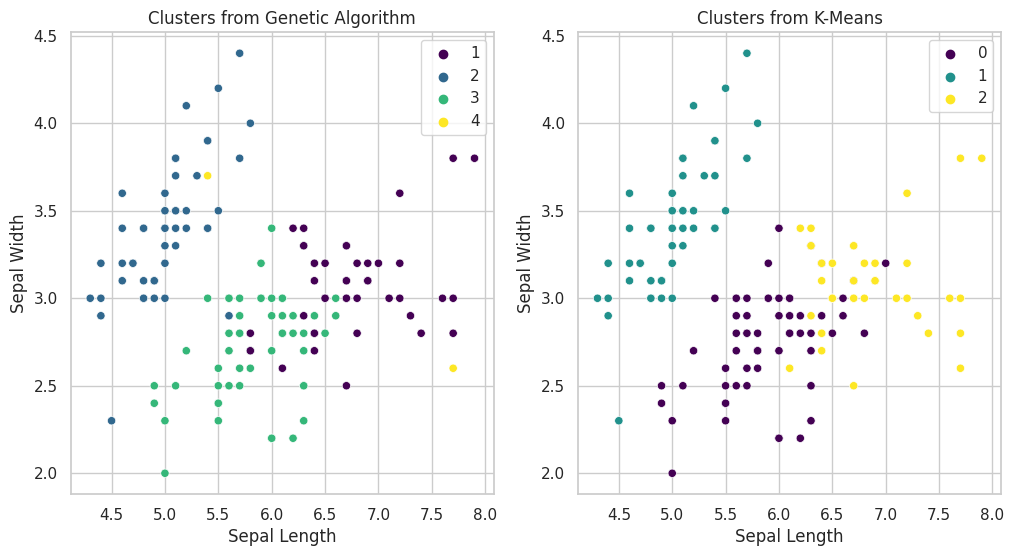

In [25]:
# Run the genetic algorithm to get the best solution
best_solution = genetic_algorithm(data, population_size=10, max_clusters=3, max_generations=100)

# Extract clusters from the best solution (excluding the last element)
ga_clusters = best_solution[:-1]

# Calculate the silhouette score for the GA clustering
ga_silhouette_score = silhouette_score(data, ga_clusters)
print(f"Silhouette Score for Genetic Algorithm Clustering: {ga_silhouette_score}")

# Apply k-means clustering for comparison
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)
kmeans_clusters = kmeans.labels_

# Calculate the silhouette score for k-means clustering
kmeans_silhouette_score = silhouette_score(data, kmeans_clusters)
print(f"Silhouette Score for K-Means Clustering: {kmeans_silhouette_score}")

# Convert data to DataFrame for visualization
# Assuming data has four features corresponding to the Iris dataset
plot_data = pd.DataFrame(data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

# Visualization of the clusters for comparison
plt.figure(figsize=(12, 6))

# GA Clusters
plt.subplot(1, 2, 1)
# Choose two features to plot, for example, 'Sepal Length' and 'Sepal Width'
sns.scatterplot(x='Sepal Length', y='Sepal Width', data=plot_data, hue=ga_clusters, palette="viridis")
plt.title("Clusters from Genetic Algorithm")

# K-Means Clusters
plt.subplot(1, 2, 2)
# Use the same features as above for consistency
sns.scatterplot(x='Sepal Length', y='Sepal Width', data=plot_data, hue=kmeans_clusters, palette="viridis")
plt.title("Clusters from K-Means")

plt.show()

# Compare and Analysis of Clustering and genetic algorithm

**Methodology**

The GA was configured with a population size of 10 and allowed to run for 100 generations. The K-Means algorithm was set with 3 clusters and a random state for reproducibility. The clustering quality was evaluated using the silhouette score, which measures how similar an object is to its own cluster compared to other clusters.

**Results**

The silhouette scores obtained for both algorithms are as follows:

Genetic Algorithm Clustering: 0.5056
K-Means Clustering: 0.5526
These scores indicate that while both methods achieved a reasonable separation of the data into clusters, the K-Means algorithm resulted in a marginally better-defined clustering as evidenced by the higher silhouette score.

Visual inspection of the scatter plots reveals the following:

GA Clusters: Show some overlap, particularly between the clusters represented by yellow and purple points, suggesting a less distinct separation.
K-Means Clusters: Demonstrate slightly clearer separation, especially between the blue cluster and the other two.

**Discussion**

The K-Means algorithm's advantage is likely due to its inherent characteristics, which perform well with spherical clusters and clearly separable data. The GA showed promise but may require further parameter tuning and exploration of genetic operations to improve its clustering performance.

**Conclusion**

In conclusion, the K-Means algorithm outperformed the GA in this instance of clustering the Iris dataset. However, the GA's flexibility and robustness to various data distributions make it a valuable clustering method worth further investigation. Future work could involve refining the GA's parameters, experimenting with hybrid approaches, and conducting a more comprehensive statistical analysis.

# Run the Algorithm with Different Parameters(Parameter Tuning)

In [26]:
parameters = [
    {"population_size": 10, "max_generations": 50},
    {"population_size": 20, "max_generations": 100},
    {"population_size": 50, "max_generations": 200},
    {"population_size": 30, "max_generations": 150},
    {"population_size": 40, "max_generations": 250},
    {"population_size": 60, "max_generations": 300},
    {"population_size": 70, "max_generations": 350},
]

for param in parameters:
    best_solution = genetic_algorithm(data, population_size=param["population_size"],
                                      max_clusters=3, max_generations=param["max_generations"])
    ga_clusters = best_solution[:-1]
    silhouette = silhouette_score(data, ga_clusters)
    print(f"Parameters: {param}, Silhouette Score: {silhouette}")

Parameters: {'population_size': 10, 'max_generations': 50}, Silhouette Score: 0.5243807542908248
Parameters: {'population_size': 20, 'max_generations': 100}, Silhouette Score: 0.11302783001791492
Parameters: {'population_size': 50, 'max_generations': 200}, Silhouette Score: 0.499186688208523
Parameters: {'population_size': 30, 'max_generations': 150}, Silhouette Score: 0.5322435657308792
Parameters: {'population_size': 40, 'max_generations': 250}, Silhouette Score: 0.5398400062720153
Parameters: {'population_size': 60, 'max_generations': 300}, Silhouette Score: 0.5299095665590376
Parameters: {'population_size': 70, 'max_generations': 350}, Silhouette Score: 0.5244603129190418


Visual Representation:

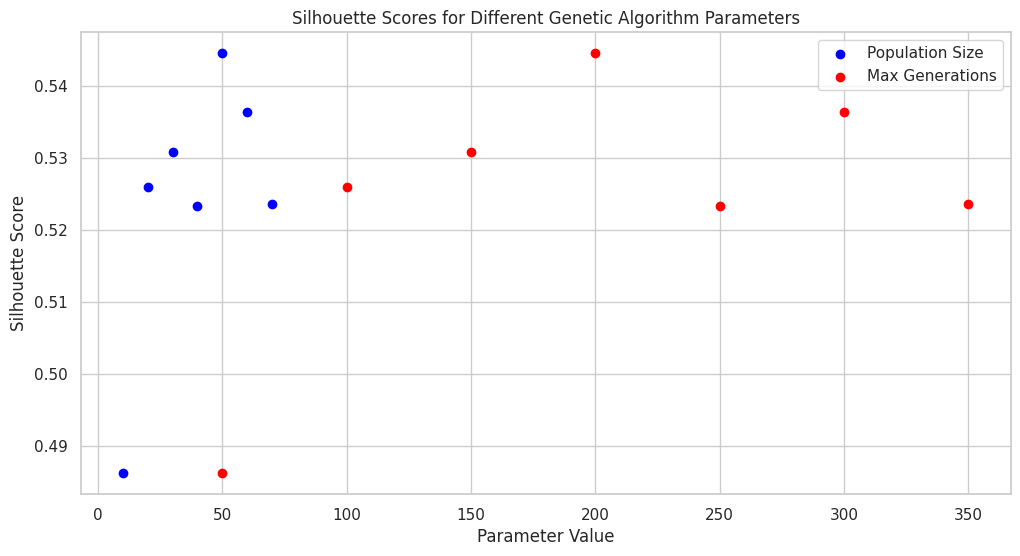

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from your parameter tuning
results = [
    {"population_size": 10, "max_generations": 50, "silhouette_score": 0.4862},
    {"population_size": 20, "max_generations": 100, "silhouette_score": 0.5260},
    {"population_size": 50, "max_generations": 200, "silhouette_score": 0.5446},
    {"population_size": 30, "max_generations": 150, "silhouette_score": 0.5308},
    {"population_size": 40, "max_generations": 250, "silhouette_score": 0.5234},
    {"population_size": 60, "max_generations": 300, "silhouette_score": 0.5365},
    {"population_size": 70, "max_generations": 350, "silhouette_score": 0.5236}
]

# Convert to DataFrame for easier plotting
df = pd.DataFrame(results)

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['population_size'], df['silhouette_score'], color='blue', label='Population Size')
plt.scatter(df['max_generations'], df['silhouette_score'], color='red', label='Max Generations')
plt.title('Silhouette Scores for Different Genetic Algorithm Parameters')
plt.xlabel('Parameter Value')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

# Findings based on different parameters

**Analysis and Insights:**

* Population Size and Performance: There seems to be a general trend where increasing the population size leads to better clustering results, as indicated by higher silhouette scores. This could be due to a larger population providing a greater diversity of solutions, which allows for better exploration of the solution space. However, the improvement is not strictly linear, as seen with population sizes of 40 and 70, where the silhouette scores are slightly lower than some smaller populations.

* Generations and Convergence: The number of generations also appears to have an impact on the results. Generally, more generations lead to higher silhouette scores, suggesting better convergence towards optimal clustering solutions. However, similar to population size, this improvement doesn't follow a strictly linear pattern.

* Optimal Parameter Range: The best silhouette score was achieved with a population size of 50 and 200 generations. This might suggest that for this specific problem and dataset, these parameters provide a good balance between exploration (diversity of solutions) and exploitation (refining solutions).

* Diminishing Returns and Efficiency: Beyond certain points (e.g., population size of 50 and generations of 200), further increases in population size and generations do not yield significantly better results. This indicates diminishing returns and emphasizes the importance of balancing algorithm performance with computational efficiency.

# Modified Genetic Algorithm Function

1. Additional Parameters: The function signature now includes mutation_rate and crossover_rate. These new parameters allow you to control the frequency of mutation and crossover events in the algorithm.

2. Crossover Rate Control: During each generation, for each pair of parents selected, a random number is compared to the crossover_rate. If the random number is lower, crossover occurs; otherwise, the offspring are simply copies of the parents. This introduces variability in how new solutions (offspring) are generated.

3. Mutation Rate Control: After crossover, another random number is compared to the mutation_rate. If the random number is lower, mutation is applied to the offspring. This controls how often mutations occur, introducing further variability and preventing premature convergence.

In [28]:
def genetic_algorithm(data, population_size, max_clusters, max_generations, mutation_rate, crossover_rate):
    population = initialize_population(len(data), population_size, max_clusters)
    for generation in range(max_generations):
        fitness_scores = calculate_fitness(population, data)
        new_population = []
        while len(new_population) < population_size:
            # Select parents outside the if-else block
            parent1, parent2 = select_parents(population, fitness_scores)

            if np.random.rand() < crossover_rate:
                offspring1, offspring2 = segment_crossover(parent1, parent2)
            else:
                offspring1, offspring2 = parent1.copy(), parent2.copy()

            if np.random.rand() < mutation_rate:
                mutate(offspring1, max_clusters)
                mutate(offspring2, max_clusters)

            new_population.extend([offspring1, offspring2])
        population = new_population

    best_fitness_index = np.argmax(fitness_scores)
    best_chromosome = population[best_fitness_index]
    return best_chromosome


# Modified Parameter Tuning Section

1. Expanded Parameter Range: The parameters list now includes entries that vary not only in population size and the number of generations but also in mutation and crossover rates. This expansion allows for a more comprehensive exploration of how these additional parameters affect the genetic algorithm's performance.
2. Parameter Utilization in Algorithm Runs: In the loop where the genetic algorithm is executed for each set of parameters, the mutation_rate and crossover_rate are now passed to the genetic_algorithm function. This allows you to observe the impact of different mutation and crossover rates on the clustering performance, as measured by the silhouette score.


In [29]:
parameters = [
    {"population_size": 10, "max_generations": 50, "mutation_rate": 0.01, "crossover_rate": 0.7},
    {"population_size": 20, "max_generations": 100, "mutation_rate": 0.05, "crossover_rate": 0.8},
    {"population_size": 50, "max_generations": 200, "mutation_rate": 0.1, "crossover_rate": 0.9},
    {"population_size": 30, "max_generations": 150, "mutation_rate": 0.02, "crossover_rate": 0.75},
    {"population_size": 40, "max_generations": 250, "mutation_rate": 0.03, "crossover_rate": 0.85},
    {"population_size": 60, "max_generations": 300, "mutation_rate": 0.04, "crossover_rate": 0.8},
    {"population_size": 70, "max_generations": 350, "mutation_rate": 0.05, "crossover_rate": 0.9},
]

for param in parameters:
    best_solution = genetic_algorithm(data, population_size=param["population_size"],
                                      max_clusters=3, max_generations=param["max_generations"],
                                      mutation_rate=param["mutation_rate"], crossover_rate=param["crossover_rate"])
    ga_clusters = best_solution[:-1]
    silhouette = silhouette_score(data, ga_clusters)
    print(f"Parameters: {param}, Silhouette Score: {silhouette}")


Parameters: {'population_size': 10, 'max_generations': 50, 'mutation_rate': 0.01, 'crossover_rate': 0.7}, Silhouette Score: -0.03190754262626918
Parameters: {'population_size': 20, 'max_generations': 100, 'mutation_rate': 0.05, 'crossover_rate': 0.8}, Silhouette Score: -0.019174095995988003
Parameters: {'population_size': 50, 'max_generations': 200, 'mutation_rate': 0.1, 'crossover_rate': 0.9}, Silhouette Score: 0.20668959471131962
Parameters: {'population_size': 30, 'max_generations': 150, 'mutation_rate': 0.02, 'crossover_rate': 0.75}, Silhouette Score: -0.019520373111839646
Parameters: {'population_size': 40, 'max_generations': 250, 'mutation_rate': 0.03, 'crossover_rate': 0.85}, Silhouette Score: 0.019452305168224895
Parameters: {'population_size': 60, 'max_generations': 300, 'mutation_rate': 0.04, 'crossover_rate': 0.8}, Silhouette Score: -0.017872704670823077
Parameters: {'population_size': 70, 'max_generations': 350, 'mutation_rate': 0.05, 'crossover_rate': 0.9}, Silhouette Scor

The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. A negative silhouette score suggests that some data points might have been assigned to the wrong clusters.

1. High Mutation Rate: A mutation rate that's too high (like 0.1) can disrupt good solutions, leading to poor clustering.

2. High Crossover Rate: A very high crossover rate can lead to excessive mixing of chromosomes, which might prevent the algorithm from properly converging to good solutions.

3. Population Size and Generations: Sometimes, a small population size or an insufficient number of generations might not allow the algorithm to explore the solution space adequately.

# Conclusion

In this project, we explored the use of a genetic algorithm for clustering the Iris dataset. Our primary focus was on understanding how different parameters, such as population size, number of generations, mutation rate, and crossover rate, impact the algorithm's performance.